# Dossier - Traitement d'images : le débruitage

In [2]:
# imports
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
print(ski.__version__)

0.21.0


# I - Bruitage d'une image

## Gaussian filter

In [3]:
def add_gaussian_noise(image, mean, sigma):
    """Adds Gaussian noise to an image.

    Args:
        image : The input image as a NumPy array.
        mean : Mean of the Gaussian noise.
        sigma : Standard deviation of the Gaussian noise.
        
    Returns:
        The image with added Gaussian noise as a NumPy array.
    """
    # Create a Gaussian noise matrix with the same shape as the input image
    gaussian_noise = np.random.normal(mean, sigma, size=image.shape)
    
    # Clip the values to the 0-255 range (assuming the image is in the 8-bit grayscale format)
    noisy_image = np.clip(image + gaussian_noise, 0, 255)
    
    # Normalize the noise to the range [0, 1] for display purposes
    normalized_noise = (gaussian_noise - gaussian_noise.min()) / (gaussian_noise.max() - gaussian_noise.min())
    
    # Show the noisy image
    plt.figure(figsize=(10, 10))
    plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Image with Gaussian Noise')
    plt.xlabel('X-Axis (Pixels)')
    plt.ylabel('Y-Axis (Pixels)')
    plt.show()
    
    # Plot a histogram of the normalized noise values
    plt.hist(normalized_noise.ravel(), bins=256, range=(0, 1), density=True)
    plt.title('Histogram of Gaussian Noise')
    plt.xlabel('Normalized Noise Value')
    plt.ylabel('Frequency')
    plt.show()

    return noisy_image

    

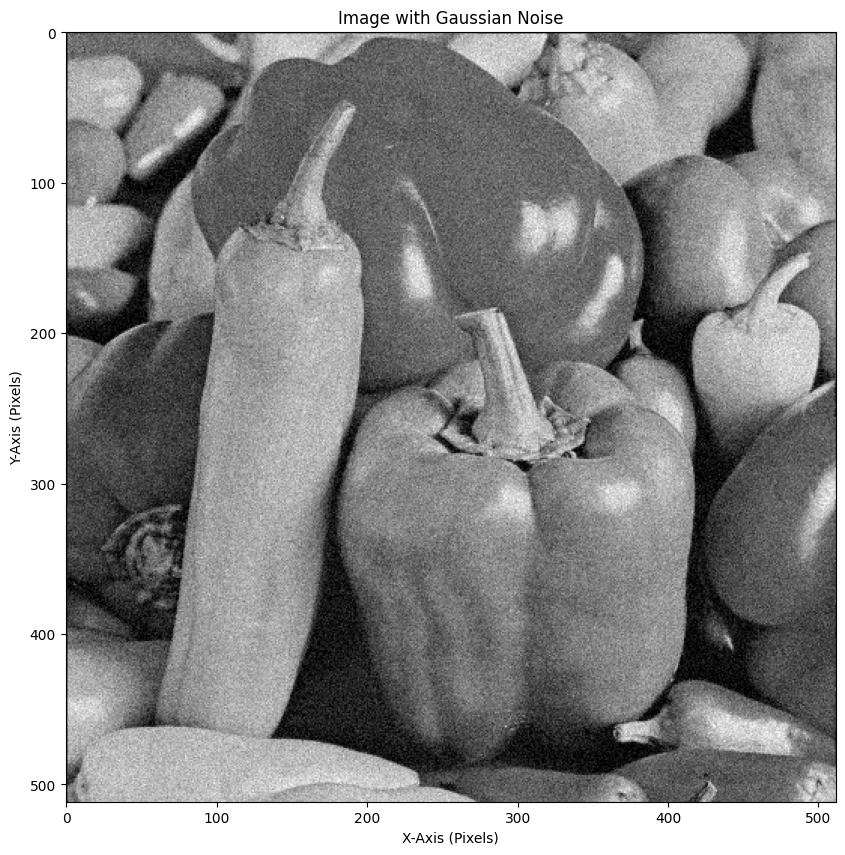

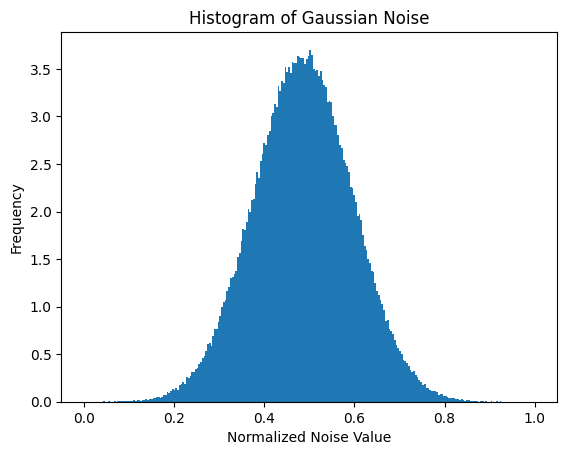

-21.8746517046446


In [4]:
img = ski.io.imread('Resources/referenceSNR/image1_reference.png', as_gray=True)
noisy_img = add_gaussian_noise(img, 0, 15)
print(snr(img, noisy_img))

## Multiplicative Noise (log-normal distribution)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def add_multiplicative_noise(image, mean, sigma):
    """Adds multiplicative noise to an image using a log-normal distribution.

    Args:
        image : The input image as a NumPy array.
        mean : Mean of the log-normal distribution.
        sigma : Standard deviation of the log-normal distribution.
        
    Returns:
        The image with added multiplicative noise as a NumPy array.
    """
    # Generate multiplicative noise using a log-normal distribution
    noise = np.random.lognormal(mean, sigma, size=image.shape)
    
    # Apply the noise to the image by element-wise multiplication
    noisy_image = image * noise
    
    # Clip the values to the 0-255 range (assuming the image is in the 8-bit grayscale format)
    noisy_image = np.clip(noisy_image, 0, 255)
    
    # Show the noisy image with labels for the axes
    plt.figure(figsize=(10, 10))
    plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
    plt.title('Image with Multiplicative Noise')
    plt.xlabel('X-Axis (Pixels)')
    plt.ylabel('Y-Axis (Pixels)')
    plt.show()

    return noisy_image


In [ ]:
img = ski.io.imread('Resources/referenceSNR/image1_reference.png', as_gray=True)
noisy_img = add_multiplicative_noise(img, 0, 0.5)

## “salt and pepper” noise

In [ ]:
def add_salt_pepper_noise(image, prob):
    """Adds salt and pepper noise to an image.
    
    Args:
        image: The input image.
        prob: Probability of the noise.
    
    Returns:
        The image with salt and pepper noise.
    """
    # get the dimensions of the image
    row, col = image.shape
    # randomly pick some pixels in the 
    # image for coloring them white
    # pick the num pixels using the probability passed
    num_pix = int(prob*row*col)
    for i in range(num_pix):
        # pick a random position
        x = np.random.randint(0, row-1)
        y = np.random.randint(0, col-1)
        # color that position white
        image[x, y] = 255
        # pick another random position
        x = np.random.randint(0, row-1)
        y = np.random.randint(0, col-1)
        # color that position black
        image[x, y] = 0

    # return the image with salt and pepper noise added
    return image



In [ ]:
# apply salt and pepper noise to the image
image = ski.io.imread("Resources/referenceSNR/image1_reference.png")
image = add_salt_pepper_noise(image, 0.01)
# display the noisy image
plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
# bruit salt-and-pepper
image = ski.io.imread("Resources/referenceSNR/image1_reference.png")
image = ski.img_as_float(image)
image = add_noise(image, "salt-and-pepper", 0.01)
plt.imshow(image, cmap='gray')
plt.show()

## Image quality measure

In [1]:
def snr(img1, img2):
    p_singal1 = np.sum(img1**2)
    p_singal2 = np.sum(img2**2)
    snr = 10*np.log10(p_singal1/p_singal2)
    return snr

In [ ]:
# codes pour générer des images bruitées en utilisant les différents types de bruit décrits dans le dossier 
# (bruit additif, bruit salt-and-pepper, bruit multiplicatif)

def add_noise(image, noise_type, noise_level):
    """
    Ajoute un bruit à une image
    
    :param image: image à bruitée
    :param noise_type: type de bruit à ajouter
    :param noise_level: niveau de bruit à ajouter
    :return: image bruitée
    """

    if noise_type == "additive":
        # bruit additif
        return ski.util.random_noise(image, mode='gaussian', var=noise_level)
    
    elif noise_type == "salt-and-pepper":
        # bruit salt-and-pepper
        return ski.util.random_noise(image, mode='s&p', amount=noise_level)
    
    elif noise_type == "multiplicative":
        # bruit multiplicatif
        return ski.util.random_noise(image, mode='speckle', var=noise_level)
    
    else:
        print("Error: noise_type must be 'additive', 'salt-and-pepper' or 'multiplicative'")

In [ ]:
# test de la fonction add_noise
# image Resources/referenceSNR/image1_reference.png
# bruit additif
image = ski.io.imread("Resources/referenceSNR/image1_reference.png")
image = ski.img_as_float(image)
image = add_noise(image, "additive", 0.005)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# bruit multiplicatif
image = ski.io.imread("Resources/referenceSNR/image1_reference.png")
image = ski.img_as_float(image)
image = add_noise(image, "multiplicative", 0.1)
plt.imshow(image, cmap='gray')
plt.show()
